In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
from sklearn.model_selection import TimeSeriesSplit


In [8]:
dataset=pd.read_csv('twins_1992-1997.csv')

In [10]:
dataset.head()
dataset.corr()

,year,month,day,latitude,longitude,zon.winds,mer.winds,humidity,air temp.,s.s.temp.
year,1.000000,-0.035773,-0.001598,0.025377,-0.065347,-0.136665,-0.008030,-0.052750,-0.096677,-0.108756
month,-0.035773,1.000000,0.008446,-0.006229,-0.012346,0.043942,0.236575,-0.139174,-0.140776,-0.102230
day,-0.001598,0.008446,1.000000,-0.004107,-0.003402,0.012608,0.000019,-0.005761,-0.009149,-0.006372
latitude,0.025377,-0.006229,-0.004107,1.000000,0.058606,0.130305,-0.012697,0.165024,0.067733,0.124631
longitude,-0.065347,-0.012346,-0.003402,0.058606,1.000000,0.423744,-0.063004,-0.031024,0.302220,0.384435
zon.winds,-0.136665,0.043942,0.012608,0.130305,0.423744,1.000000,0.089595,0.069842,0.217005,0.350441
mer.winds,-0.008030,0.236575,0.000019,-0.012697,-0.063004,0.089595,1.000000,0.126375,-0.384046,-0.325051
humidity,-0.052750,-0.139174,-0.005761,0.165024,-0.031024,0.069842,0.126375,1.000000,-0.411020,-0.358011
air temp.,-0.096677,-0.140776,-0.009149,0.067733,0.302220,0.217005,-0.384046,-0.411020,1.000000,0.944208
s.s.temp.,-0.108756,-0.102230,-0.006372,0.124631,0.384435,0.350441,-0.325051,-0.358011,0.944208,1.000000


In [12]:
dataset['humidity'].interpolate(inplace=True)

In [24]:
dataset['zon.winds'].fillna(np.random.normal(dataset['zon.winds'].mean(),dataset['zon.winds'].std()),inplace=True)
dataset['mer.winds'].fillna(np.random.normal(dataset['mer.winds'].mean(),dataset['mer.winds'].std()),inplace=True)

In [26]:
dataset['humidity']=dataset['humidity'].fillna(dataset['humidity'].mean(),)

In [28]:
dataset=dataset.dropna(subset=['air temp.'])

In [30]:
dataset.head()

,year,month,day,latitude,longitude,zon.winds,mer.winds,humidity,air temp.,s.s.temp.
0,1992,1,1,5.01,-110.00,-3.300000,3.600000,81.281851,26.39,27.40
1,1992,1,1,1.98,-140.40,-4.400000,4.100000,81.281851,27.75,28.27
2,1992,1,1,5.00,-140.00,-7.851305,-3.271046,81.281851,26.70,28.27
3,1992,1,1,-2.00,156.00,9.600000,4.300000,81.281851,27.77,29.39
4,1992,1,1,8.04,-110.06,-7.851305,-3.271046,86.300000,26.72,27.30


In [32]:
dataset = dataset.drop(['year', 'month', 'day'], axis=1)


In [34]:
X = dataset[['latitude', 'longitude', 'zon.winds', 'mer.winds', 'humidity', 'air temp.']]
y = dataset['s.s.temp.']

In [51]:

tss=TimeSeriesSplit(n_splits=3)
for train,test in tss.split(X):
    X_train,X_test=X.iloc[train,:],X.iloc[test,:]
    y_train,y_test=y.iloc[train],y.iloc[test]

In [53]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [55]:
xgb_model = xgb.XGBRegressor(n_estimators=1000, learning_rate=0.1, random_state=42)

In [57]:
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [58]:
y_pred = xgb_model.predict(X_test)

In [44]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
model_score = xgb_model.score(X_test, y_test)
print(f"Model Score (R²): {model_score}")
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(results_df)

Mean Squared Error: 0.2274618202600758
R-squared: 0.9545908593422312
Model Score (R²): 0.9545908593422312
       Actual  Predicted
58394   29.11  28.868179
58395   25.84  26.911842
58396   25.58  25.899872
58397   27.61  27.342962
58398   24.33  24.676264
...       ...        ...
77501   29.45  28.894567
77502   27.31  27.452789
77503   28.50  28.373825
77504   29.10  28.972319
77505   23.52  23.051691

[18039 rows x 2 columns]


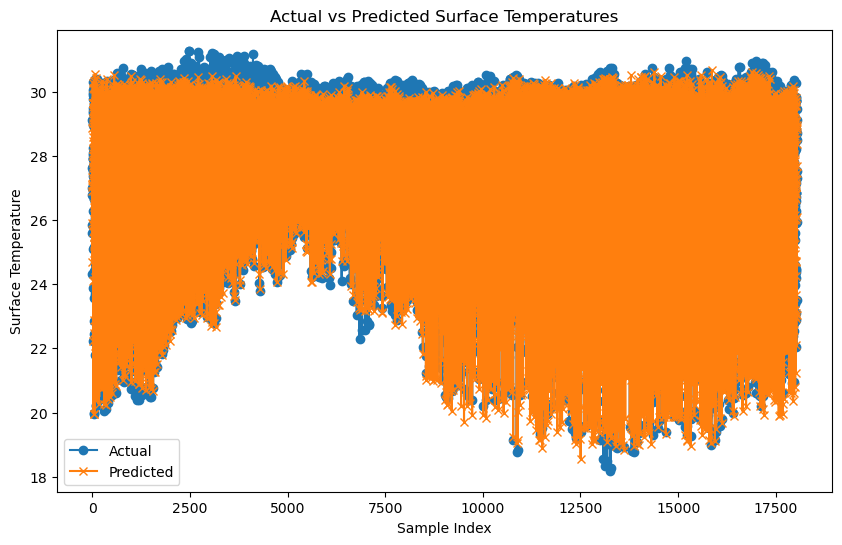

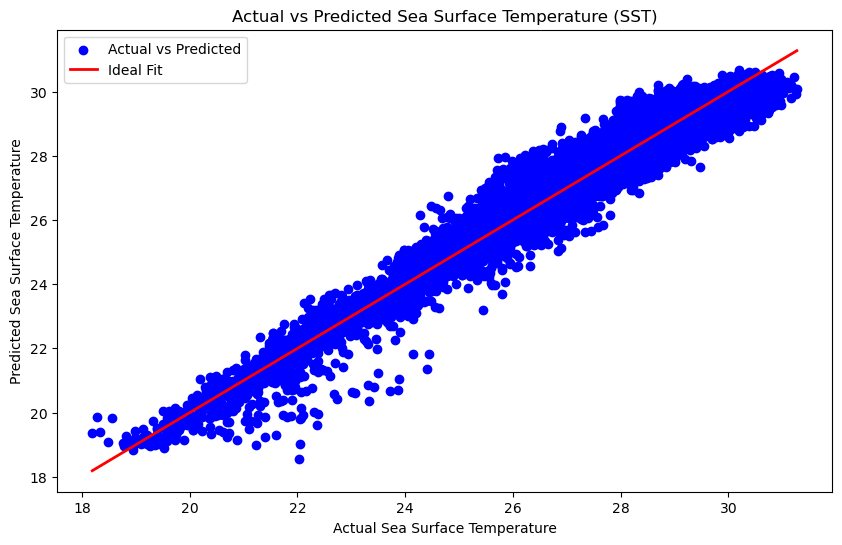

In [45]:
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual', marker='o')
plt.plot(y_pred, label='Predicted', marker='x')
plt.title('Actual vs Predicted Surface Temperatures')
plt.xlabel('Sample Index')
plt.ylabel('Surface Temperature')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, label='Ideal Fit')
plt.xlabel('Actual Sea Surface Temperature')
plt.ylabel('Predicted Sea Surface Temperature')
plt.title('Actual vs Predicted Sea Surface Temperature (SST)')
plt.legend()
plt.show()